Project
In this project, our aim is to building a model for predicting wine qualities. 

Our label will be quality column. 

Do not forget, this is a Classification problem!

Steps
Read the winequality.csv file and describe it.

Make at least 4 different analysis on Exploratory Data Analysis section.

Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)

Define appropriate evaluation metric for our case (classification).

Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.

Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.

Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.

Analyse and compare results of 3 algorithms.

Select best performing model based on evaluation metric you chose on test dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import csv 
import re 

from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from numpy import where
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [ ]:
pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1k7YsrcmCeb-Zs-bfX5nmChZ9ztwA6C1R"})   # replace the id with id of file you want to access
downloaded.GetContentFile('winequality.csv')        # replace the file name with your file

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
#read the data 
data= pd.read_csv('winequality.csv')
values = data.values
print(data)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [ ]:
# split into dependent an independent  variables as X and y before classification 
'''values = reframed.values'''

X = data.values[:,0:11]
y = data.values[:,11:]

In [ ]:
#check if we seperate correctly 
print (X)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


all the values are numeric. No label or one hot encoding is needed for input variables. 

Quality is ordinal. Thus we should encode it. 

In [ ]:
data.isnull().sum().sort_values(ascending = True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data["citric acid"].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

dataset is clear and has not missing values

In [ ]:
correlation=data.corr()
print (correlation)

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

In [ ]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [ ]:
#outlier detection 
outliers = list(set(np.where(z > 3)[0]))

len(outliers)
dataset = data(outliers,axis = 0).reset_index(drop = False)
y_ = y[list(dataset["index"])]
len(y_)

148

In [ ]:
# split into dependent an independent  variables as X and y before classification 

X = values[:,0:11]
y = values[:,11]
print(X)
print (y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5. 5. 5. ... 6. 5. 6.]


In [ ]:
#encode output with 2 labels.
badwine = dataset.loc[dataset['quality'] <= 6.5].index
goodwine = dataset.loc[dataset['quality'] > 6.5].index
dataset.iloc[badwine, dataset.columns.get_loc('quality')] = 0
dataset.iloc[goodwine, dataset.columns.get_loc('quality')] = 1

In [ ]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Quality differs as 3 4 5 6 7 8 We should transform this value  as good qualified wine and bad wine  .

Now we have 2 classses as output and 11 variables as input 

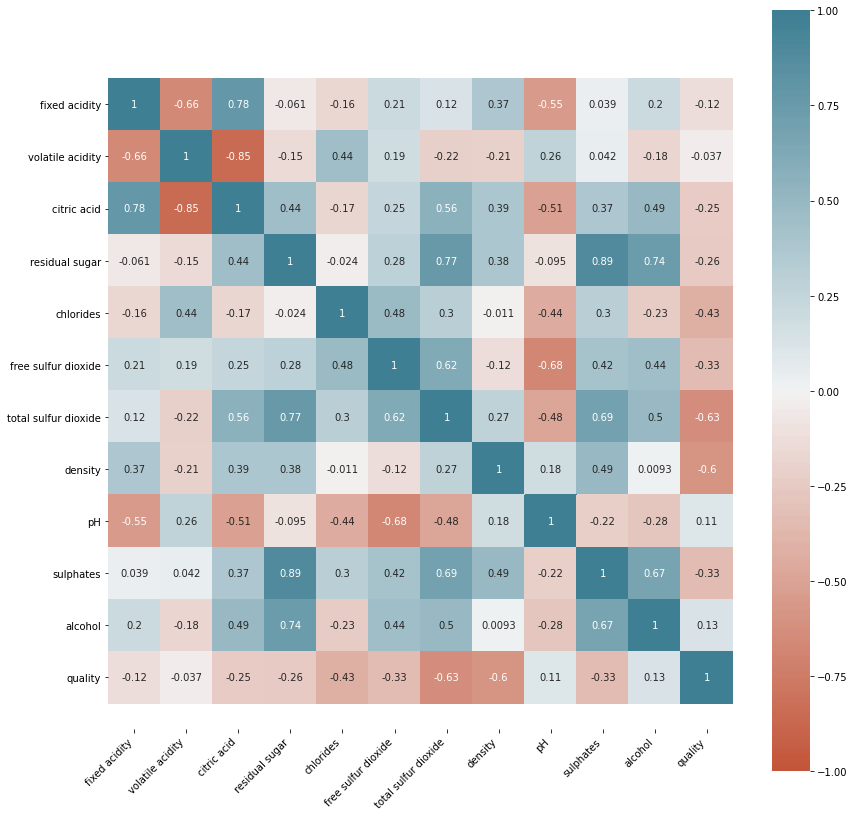

In [ ]:
# Correlation of the features
import seaborn as sns
correlation = dataset[0:11].corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(correlation)+0.5, -0.5);

Here, we can say that residual sugar and sulphates and alcohol and sulphates are highly correlated.

Also,most of the variabkles are inversely correlated such as tottal sulfur dioxide and quality. 

Feature reduction techniques such as Principal compnent analysis can be adapted 


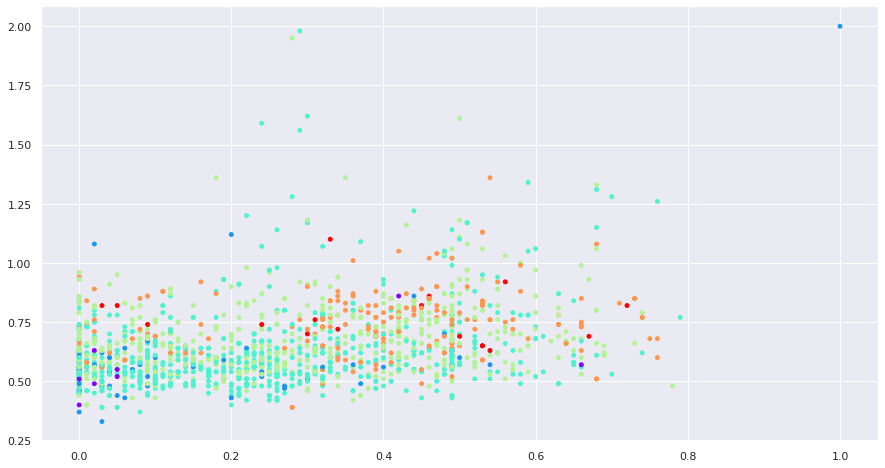

In [ ]:
#scatterplot
plt.scatter(X[:, 2], X[:, 9], c=y, s=15, cmap='rainbow');

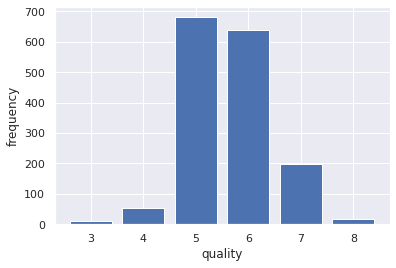

In [ ]:
#Quality is a discrete variable. Frequency Garph should be obtained 
#I tansform qulaity as categorical value and remove quality variable. 
# check the Distribution of the wine quality
quality_dist = dataset['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

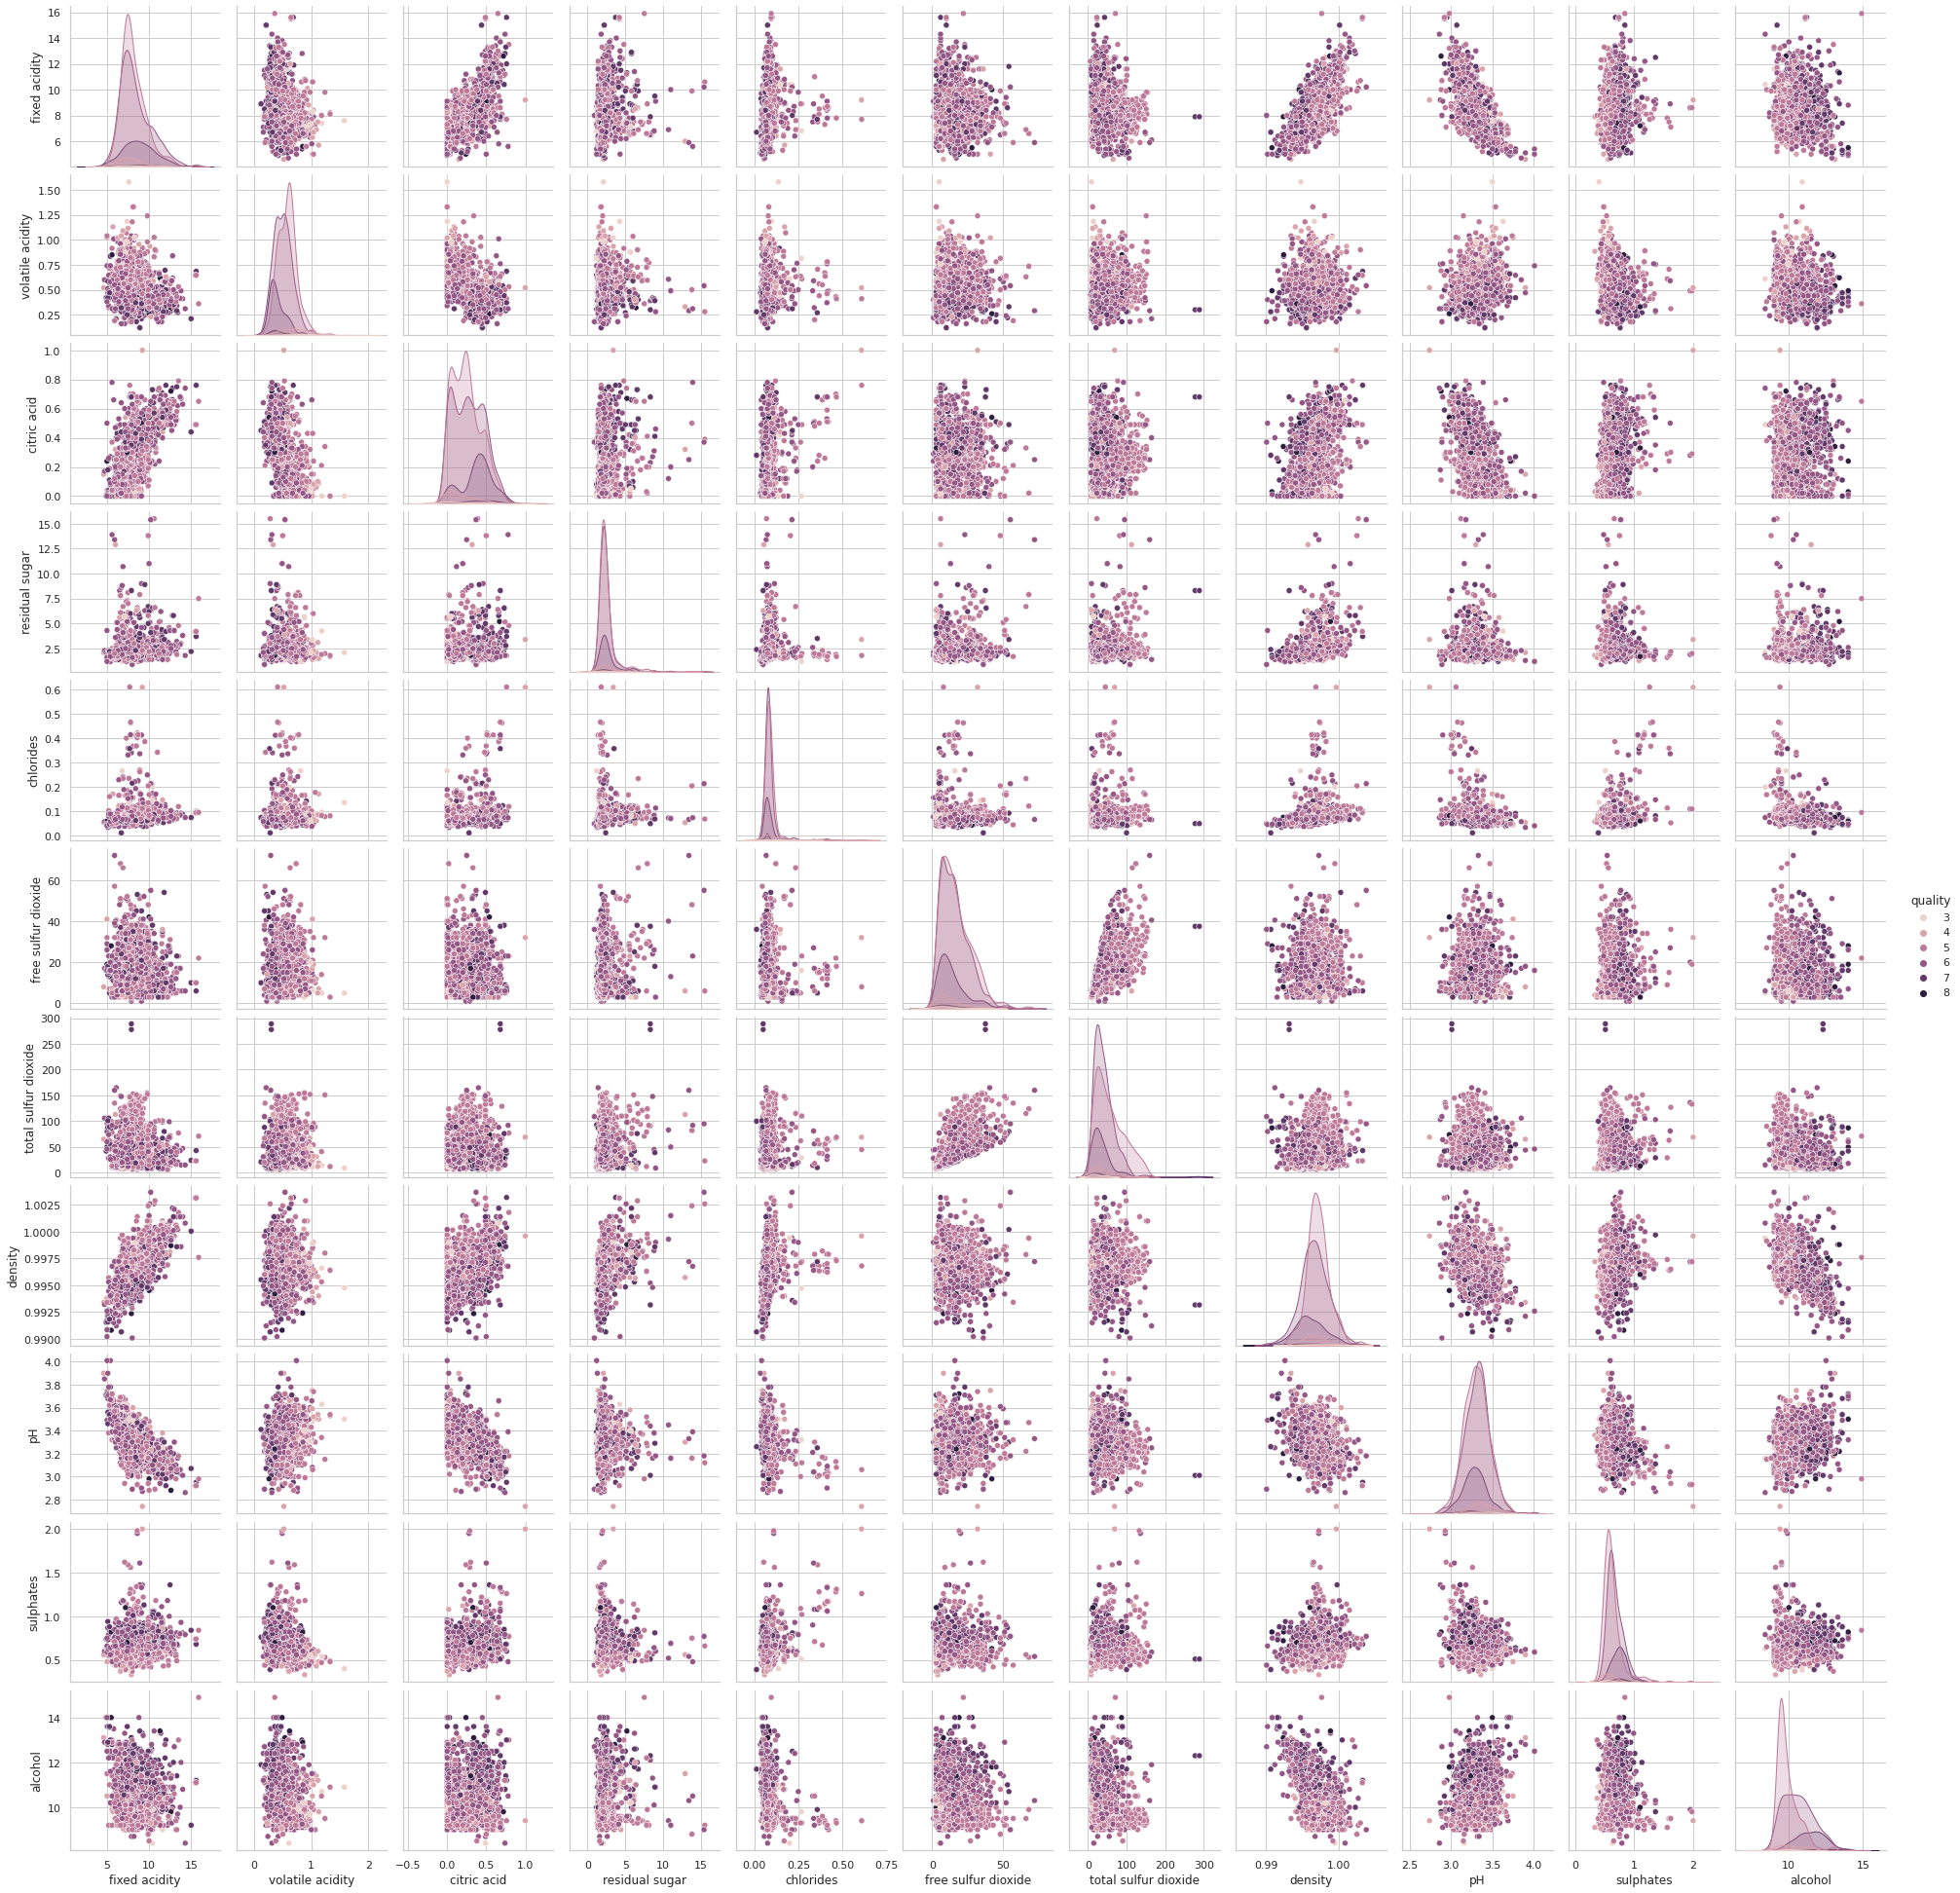

In [ ]:
#pairplot shows distributions variations according to variables 
sns.pairplot(dataset, hue="quality")

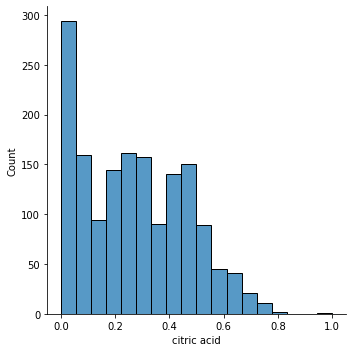

In [ ]:
#histogram of citric acid variable

sns.displot(dataset, x="citric acid")

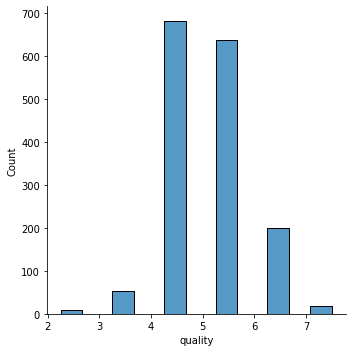

In [ ]:
sns.displot(dataset, x="quality", shrink=2.5)

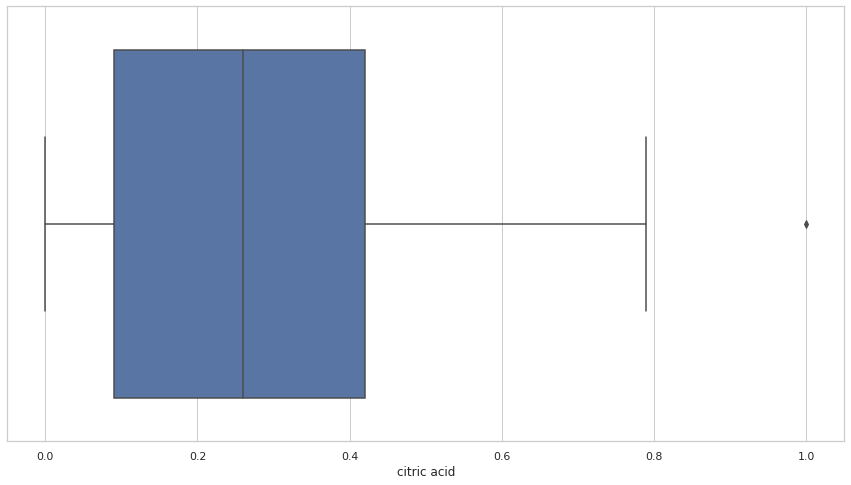

In [ ]:
#outlier detection for cidric acid can be seen from the bar chart 
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=dataset["citric acid"])

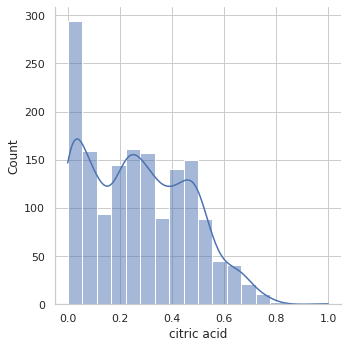

In [ ]:
sns.displot(dataset, x="citric acid", kde=True)
# citric acid has positive skewness

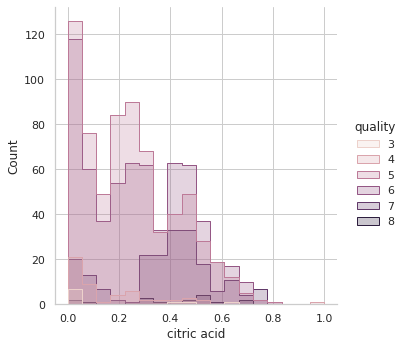

In [ ]:
sns.displot(dataset, x="citric acid", hue="quality", element="step")
#similarity of the observations of citric acid wrt quality 

In [ ]:
X.shape

(1599, 11)

In [ ]:
dataset ["quality"].describe()
#mean std deviation of quality 

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: quality, dtype: float64

In [ ]:

print(X)
print (y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]


In [ ]:
#Encoding the label
label_encoder = LabelEncoder()
dataset["Label"] = label_encoder.fit_transform(dataset["quality"]) 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [ ]:
dataset["Label"].value_counts()
# quality is labeled as bad and good quality 

0    1382
1     217
Name: Label, dtype: int64

In [ ]:
categories = list(label_encoder.inverse_transform([0, 1]))
categories

[0, 1]

In [ ]:
# Dropping unnecessary columns
clases = list(set(dataset.quality))
dataset.drop(["quality"], axis=1, inplace=True)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
#Scaling is not proper for Decision trees but Scaling the data (Standardization) for other classifiers SVC  
from sklearn import preprocessing
X_s= preprocessing.scale(X)
X_s= pd.DataFrame(X, columns = dataset.columns[:11]) #converting scaled data into dataframe

y_s= preprocessing.scale(y)
y_s = pd.DataFrame(y, columns = dataset.columns[12:]) #ideally train, test data should be in columns"""

In [ ]:
categories = [3,4]
categories

[3, 4]

In [ ]:
# Locate features and label
X, y = dataset.iloc[: , :-1], dataset.iloc[: , -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Define appropriate evaluation metric for our case (classification).
#no scaling is needed for decision trees

clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9499582985821518
Accuracy of test: 0.8675


Accuracy of train test dataset are good enough for presenting classifiers. If train accuracy is  higher than test accuracy, overfitting problem could occur

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [ ]:
# Cross validation FOR K fold
kfold = StratifiedKFold(n_splits=10)

[0.8657352941176469, 0.870735294117647, 0.8615546218487395] [0.028676638176148475, 0.02299751127400864, 0.003957171320326462] [0.85833333 0.85833333 0.85833333 0.85833333 0.85833333 0.85833333
 0.86666667 0.86666667 0.86666667 0.86554622]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


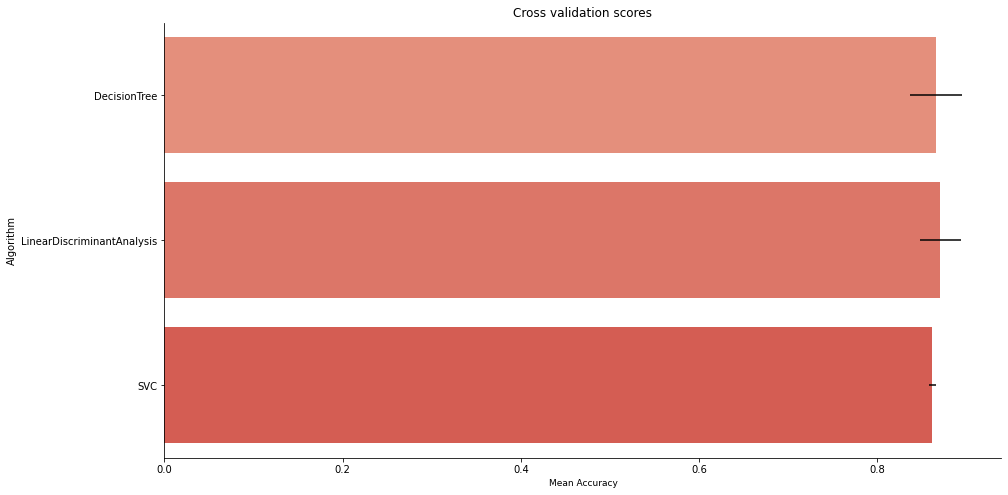

In [ ]:
#comparison of three methods 
#accuracy is selected as performance metric
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=42))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=42))
# cross validation scores for all classifiers
cv_results=[]
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y= y_train, scoring = "accuracy", cv = kfold, verbose=0))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
#Scores
print(cv_means ,cv_std, cv_result)
#List format
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","LinearDiscriminantAnalysis","SVC"]})
g = sns.barplot("CrossValMeans",y="Algorithm",data = cv_res, palette=sns.color_palette("Reds_d", n_colors=7, desat=1),orient = "h",**{'xerr':cv_std}, errwidth=None)
g.set_xlabel("Mean Accuracy",fontsize=9)
g = g.set_title("Cross validation scores")
sns.despine()
plt.show()

accuries for these 3 algorithms are [0.8657352941176469, 0.870735294117647, 0.8615546218487395] 

Linear discriminant performed better .

In [ ]:
# Making a decision tree with two levels.Parameter settings can be seen 
from sklearn import tree
clfTre = tree.DecisionTreeClassifier(max_depth=4)
clfTre.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

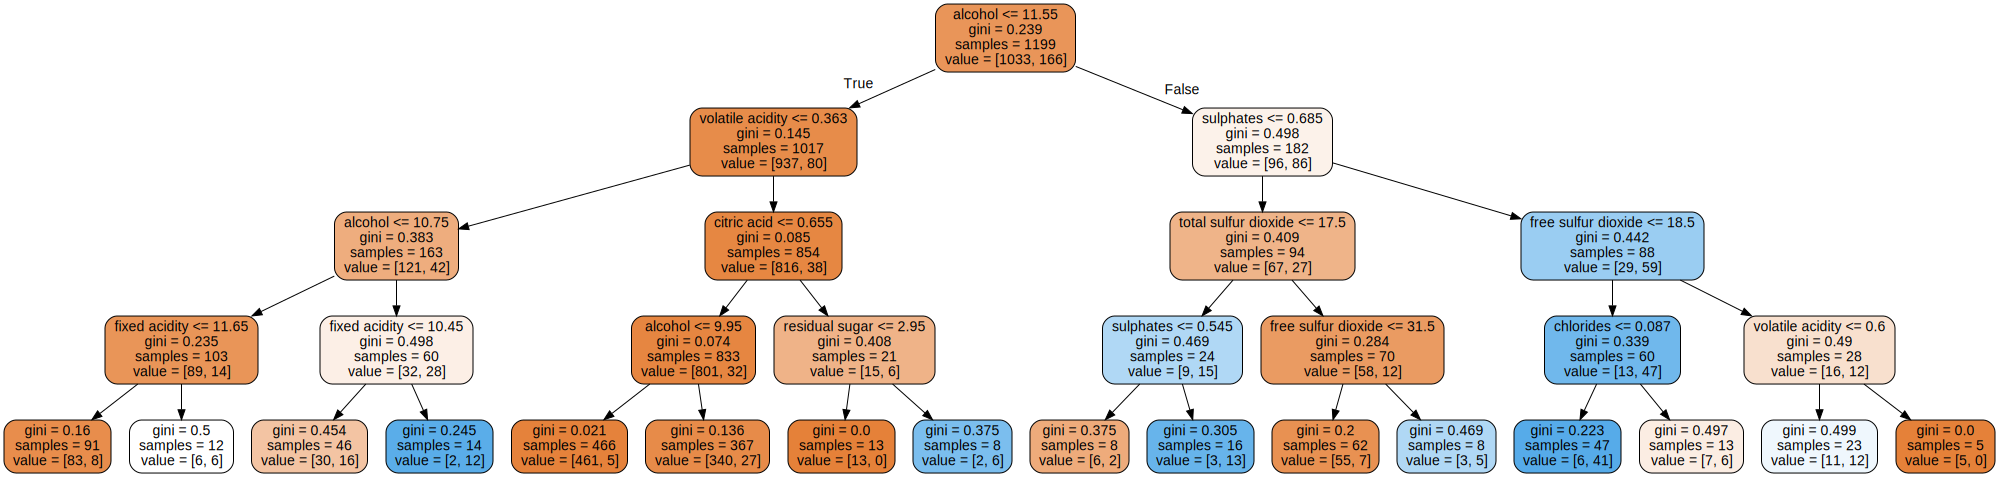

In [ ]:
#Visualizing the decision tree
#samples are mainly appeared in the same class 
#more depht is needed for decision tree
import graphviz  
data = tree.export_graphviz(clfTre, out_file=None, max_depth=4, feature_names=list(dataset.columns[:11].values), filled=True, rounded=True)
visualizeTre = graphviz.Source(data) 
visualizeTre

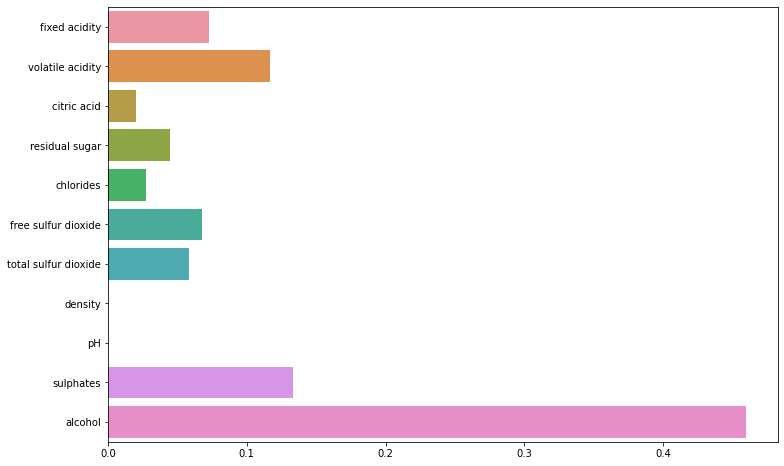

In [ ]:
#Feature Importance for Decision tree classifier
plt.figure(figsize=(12, 8))
importance = clfTre.feature_importances_
sns.barplot(x=importance, y=dataset.columns[:11])
plt.show()

In [ ]:
# Classification Report for decision trees
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clfTre.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       349
           1       0.55      0.43      0.48        51

    accuracy                           0.88       400
   macro avg       0.73      0.69      0.71       400
weighted avg       0.87      0.88      0.88       400



 overfitting CAN BE  seen for label 0. if we face overfitting, we should Train with more data, Remove features,apply regularization and ensemble methods. 

In [ ]:
# Metrics for decision tree classifier
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7347222222222223
Recall = 0.689898308893758
Accuracy = 0.8825
F1 Score = 0.7086129667229808


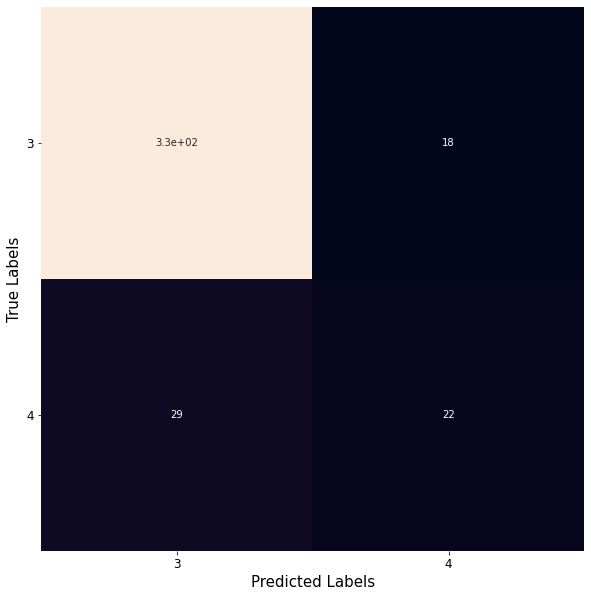

In [ ]:
# Confusion Matrix of decsision tree wrt test data 
#47 instances are classified wrongly 
#diagonal part shows truly classied observations 353
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(15, 10))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
#Scaling is not proper for Decision trees but Scaling the data (Standardization) for other classifiers SVC  
from sklearn import preprocessing
X_s= preprocessing.scale(X)
X_s= pd.DataFrame(X, columns = dataset.columns[:11]) #converting scaled data into dataframe

y_s= preprocessing.scale(y)
y_s = pd.DataFrame(y, columns = dataset.columns[12:]) #ideally train, test data should be in columns"""

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s,y_s, test_size=0.25, random_state=123)

In [ ]:
# SVC classifier parameters. Scaling should be applied 
clfSVC=SVC(random_state=42)
clfSVC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Classification Report for SVC 
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clfSVC.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       349
           1       1.00      0.02      0.04        51

    accuracy                           0.88       400
   macro avg       0.94      0.51      0.49       400
weighted avg       0.89      0.88      0.82       400



In [ ]:
# Metrics FOR svc 
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.93734335839599
Recall = 0.5098039215686274
Accuracy = 0.875
F1 Score = 0.48580830933772107


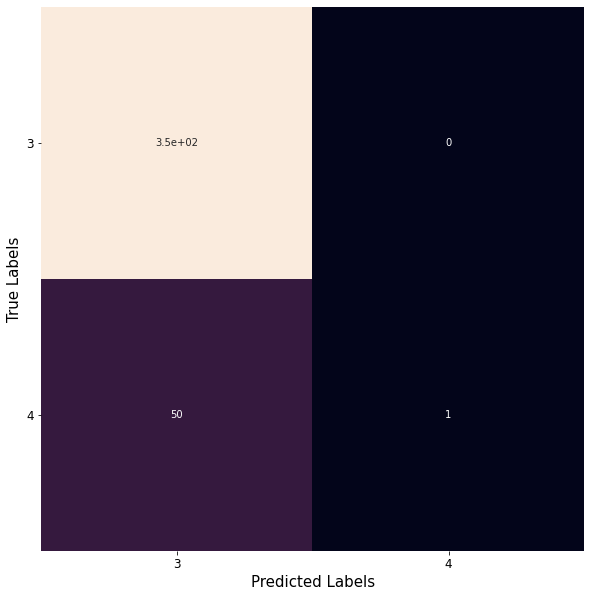

In [ ]:
# Confusion Matrix of SVC. 50 of the instances are wrongly classified. 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(15, 10))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
#CLASSIFICATION two levels with lİNEAR DISCRIMINANT ANALYSIS
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Classification Report Linear discriminant analysis 
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clfLDA.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       349
           1       0.53      0.39      0.45        51

    accuracy                           0.88       400
   macro avg       0.72      0.67      0.69       400
weighted avg       0.86      0.88      0.87       400



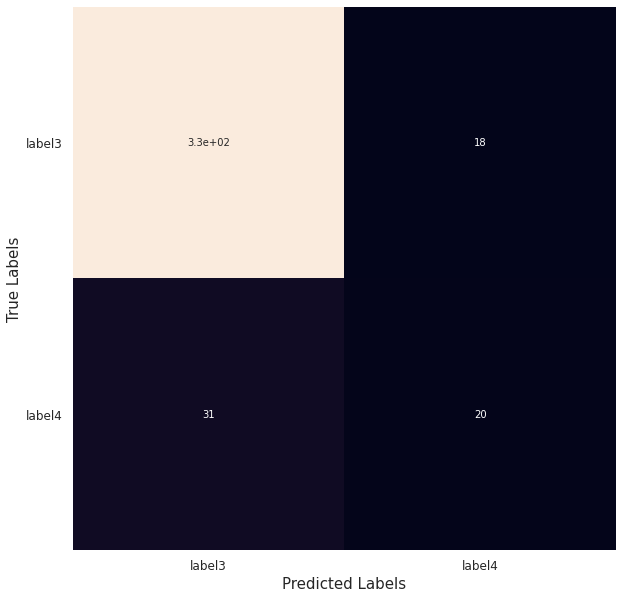

In [ ]:
# Confusion Matrix of Linear discriminant analysis 
#49 are wrongly classified. 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(15, 10))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

WRT results if we compare these three methods according to accuracy, decision tree best suits for classiification. On the other hand, precision presents positively classied instances, tthus, SVC peformed better. 

To gather better results, ensemble methods can be adapted to the same dataset 

To overcome overfitting, XGboost can be adapted to SVC 

In [ ]:
import xgboost as xgb

In [ ]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
param = {'max_depth':5, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':2}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [ ]:
categories


[3, 4]

In [ ]:
preds = model.predict(dmatrix_test)
preds[:11]

array([[0.7722843 , 0.22771572],
       [0.99704283, 0.00295712],
       [0.99425185, 0.00574823],
       [0.8185337 , 0.1814663 ],
       [0.996739  , 0.00326105],
       [0.14763285, 0.85236716],
       [0.99367803, 0.00632199],
       [0.9500893 , 0.04991075],
       [0.9902174 , 0.00978262],
       [0.996739  , 0.00326105],
       [0.99759066, 0.00240937]], dtype=float32)

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8041666666666667
Recall = 0.7460812405191303
Accuracy = 0.9075


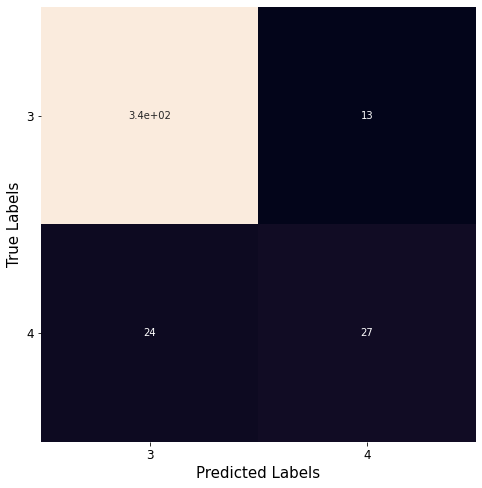

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
## Hyperparameter Tuning FOR SELECTING BEST PARAMETERS 

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV (xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

In [ ]:
#new confusion matrix 
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()